In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from nltk.corpus import stopwords
from string import punctuation

from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential, Model
from keras.utils import to_categorical,plot_model
from keras.layers import Dense, Activation
from keras.layers.normalization import BatchNormalization
from keras.initializers import he_normal
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.layers import Dropout
from keras.layers import Embedding, LSTM, GRU, Flatten, Input, concatenate, Conv1D, GlobalMaxPool1D, SpatialDropout1D, GlobalMaxPooling1D, Bidirectional, GlobalAveragePooling1D, add
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.initializers import Orthogonal
from keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/pickled-glove840b300d-for-10sec-loading/glove.840B.300d.pkl
/kaggle/input/jigsaw-unbiased-toxic-train-test-dataset-cleaned/train_clean_df2.csv
/kaggle/input/jigsaw-unbiased-toxic-train-test-dataset-cleaned/train_clean_df.csv
/kaggle/input/jigsaw-unbiased-toxic-train-test-dataset-cleaned/test_clean_df2.csv
/kaggle/input/jigsaw-unbiased-toxic-train-test-dataset-cleaned/test_clean_df.csv
/kaggle/input/jigsaw-unintended-bias-in-toxicity-classification/sample_submission.csv
/kaggle/input/jigsaw-unintended-bias-in-toxicity-classification/all_data.csv
/kaggle/input/jigsaw-unintended-bias-in-toxicity-classification/test_public_expanded.csv
/kaggle/input/jigsaw-unintended-bias-in-toxicity-classification/test_private_expanded.csv
/kaggle/input/jigsaw-unintended-bias-in-toxicity-classification/toxicity_individual_annotations.csv
/kaggle/input/jigsaw-unintended-bias-in-toxicity-classification/train.csv
/kaggle/input/jigsaw-unintended-bias-in-toxicity-classification/identity_individua

In [2]:
train_clean_df = pd.read_csv("../input/jigsaw-unbiased-toxic-train-test-dataset-cleaned/train_clean_df2.csv")
test_clean_df = pd.read_csv('../input/jigsaw-unbiased-toxic-train-test-dataset-cleaned/test_clean_df.csv')

In [3]:
train_clean_df.head()

,Unnamed: 0,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,0,59848,0.000000,cool like would want mother read really great ...,0.000000,0.0,0.000000,0.00000,0.0,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
1,1,59849,0.000000,thank would make life lot less anxietyinducing...,0.000000,0.0,0.000000,0.00000,0.0,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
2,2,59852,0.000000,urgent design problem kudos taking impressive,0.000000,0.0,0.000000,0.00000,0.0,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
3,3,59855,0.000000,something able install site releasing,0.000000,0.0,0.000000,0.00000,0.0,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
4,4,59856,0.893617,haha guys bunch losers,0.021277,0.0,0.021277,0.87234,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.0,4,47


In [4]:
test_clean_df.head()

,Unnamed: 0,id,comment_text
0,0,7097320,Integrity means pay debts apply President Trump
1,1,7097321,malfeasance Administrator Board wasting money
2,2,7097322,Rmiller101 Spoken like true elitist look bud r...
3,3,7097323,Paul Thank kind words indeed strong beliefs do...
4,4,7097324,Sorry missed high school Eisenhower sent troop...


In [5]:
train_clean_df.drop(['Unnamed: 0'], axis = 1, inplace = True)
test_clean_df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [6]:
train_clean_df.head()

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.000000,cool like would want mother read really great ...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,0.000000,thank would make life lot less anxietyinducing...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
2,59852,0.000000,urgent design problem kudos taking impressive,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
3,59855,0.000000,something able install site releasing,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
4,59856,0.893617,haha guys bunch losers,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.0,4,47


In [7]:
test_clean_df.head()

,id,comment_text
0,7097320,Integrity means pay debts apply President Trump
1,7097321,malfeasance Administrator Board wasting money
2,7097322,Rmiller101 Spoken like true elitist look bud r...
3,7097323,Paul Thank kind words indeed strong beliefs do...
4,7097324,Sorry missed high school Eisenhower sent troop...


In [8]:
train_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1804874 entries, 0 to 1804873
Data columns (total 45 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   id                                   int64  
 1   target                               float64
 2   comment_text                         object 
 3   severe_toxicity                      float64
 4   obscene                              float64
 5   identity_attack                      float64
 6   insult                               float64
 7   threat                               float64
 8   asian                                float64
 9   atheist                              float64
 10  bisexual                             float64
 11  black                                float64
 12  buddhist                             float64
 13  christian                            float64
 14  female                               float64
 15  heterosexual                    

In [9]:
train_clean_df['comment_text'] = train_clean_df.comment_text.apply(str)
test_clean_df['comment_text'] = test_clean_df.comment_text.apply(str)

In [10]:
def null_values(features):

    while features != []:
            
        a = features[0]
    
        print(train_clean_df[a].value_counts(normalize = True).head())
        print('\n')
        features.pop(0)
        
        continue

In [11]:
features = ['severe_toxicity', 'obscene','identity_attack','insult','threat', 'asian', 'black', 'jewish', 'latino', 'other_race_or_ethnicity', 'white' , 'female', 'male', 'transgender', 'other_gender','atheist','buddhist','christian', 'hindu', 'muslim', 'other_religion', 'intellectual_or_learning_disability', 'other_disability', 'physical_disability', 'psychiatric_or_mental_illness']
null_values(features)

0.000000    0.942026
0.100000    0.019080
0.166667    0.003807
0.200000    0.003127
0.014286    0.000986
Name: severe_toxicity, dtype: float64


0.000000    0.918457
0.100000    0.021513
0.166667    0.008895
0.200000    0.008636
0.300000    0.002818
Name: obscene, dtype: float64


0.000000    0.878910
0.100000    0.026766
0.200000    0.021941
0.166667    0.021615
0.300000    0.009041
Name: identity_attack, dtype: float64


0.000000    0.748160
0.166667    0.052764
0.200000    0.051873
0.300000    0.026542
0.100000    0.023157
Name: insult, dtype: float64


0.000000    0.940755
0.100000    0.015873
0.166667    0.010767
0.200000    0.009029
0.300000    0.002862
Name: threat, dtype: float64


0.000000    0.972910
0.166667    0.003848
1.000000    0.003224
0.200000    0.003137
0.100000    0.003095
Name: asian, dtype: float64


0.000000    0.951712
1.000000    0.018898
0.800000    0.003885
0.833333    0.003789
0.100000    0.003127
Name: black, dtype: float64


0.000000    0.973083
1.000000  

In [12]:
def distplot_features(features, title):
    
    plt.figure(figsize = (12,6))
    plt.title(title)
    
    while features != []:
        
        b = features[0]
        sns.distplot(x= train_clean_df[train_clean_df[b]!= 0][b], bins = 120 , hist = False, kde = True, label =b )
        features.pop(0)
        
        continue
    plt.xlabel('')
    plt.legend()
    plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='target', ylabel='Density'>

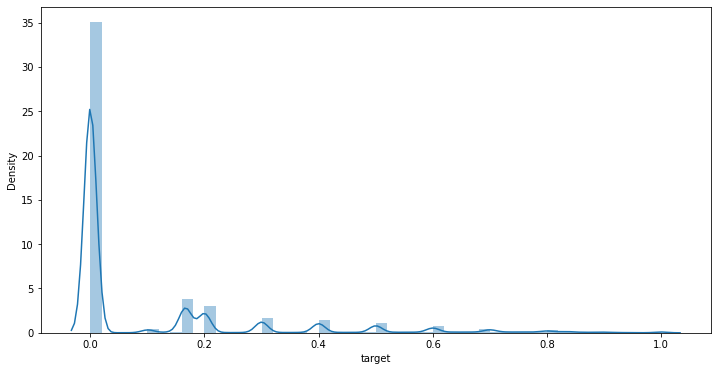

In [13]:
plt.figure(figsize = (12,6))
sns.distplot(train_clean_df['target'], bins = 50, kde = True)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

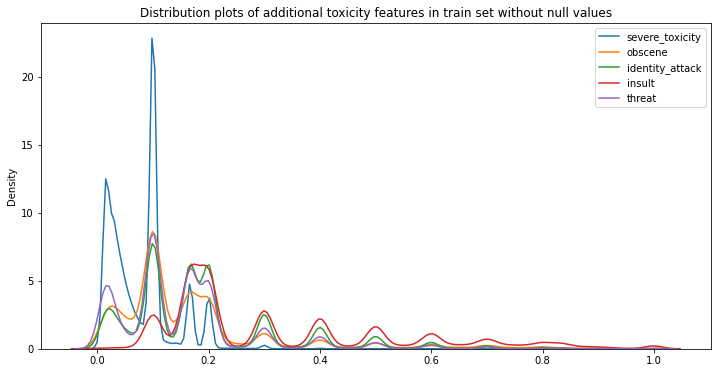

In [14]:
features = ['severe_toxicity', 'obscene','identity_attack','insult','threat']
distplot_features(features, 'Distribution plots of additional toxicity features in train set without null values')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

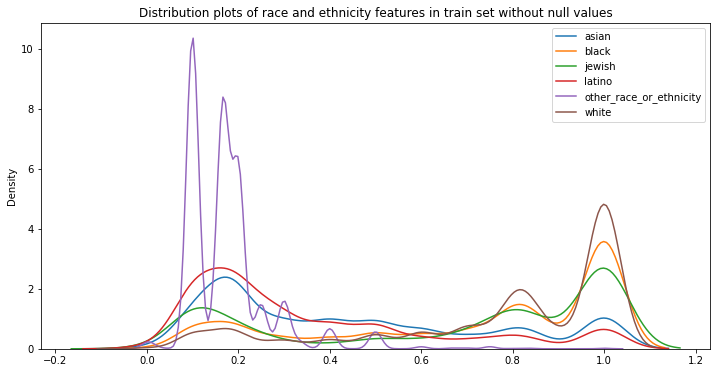

In [15]:
features = ['asian', 'black', 'jewish', 'latino', 'other_race_or_ethnicity', 'white']
distplot_features(features, 'Distribution plots of race and ethnicity features in train set without null values')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

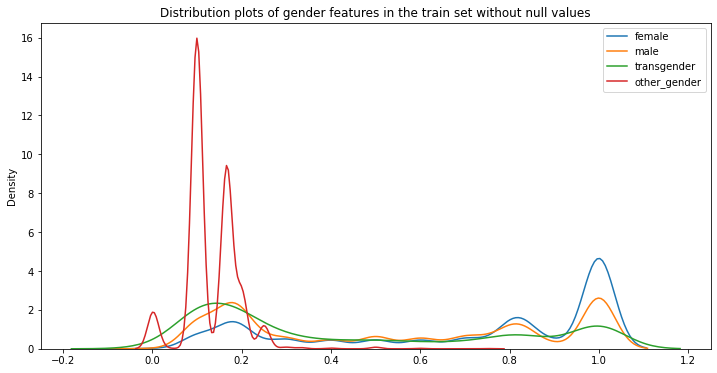

In [16]:
features = ['female', 'male', 'transgender', 'other_gender']
distplot_features(features, "Distribution plots of gender features in the train set without null values")

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

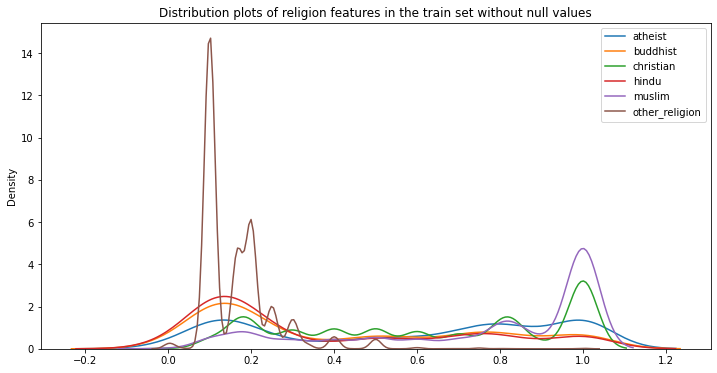

In [17]:
features = ['atheist','buddhist','christian', 'hindu', 'muslim', 'other_religion']
distplot_features(features, "Distribution plots of religion features in the train set without null values")

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

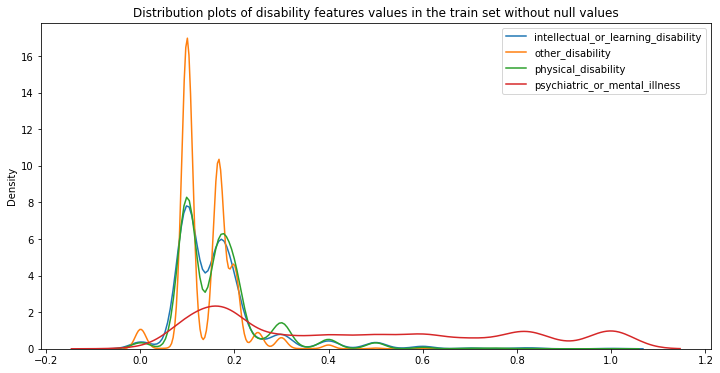

In [18]:
features = ['intellectual_or_learning_disability', 'other_disability', 'physical_disability', 'psychiatric_or_mental_illness']
distplot_features(features, "Distribution plots of disability features values in the train set without null values")

In [22]:
import wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

def wordcloud(df, label):
    
    
    subset=df[df[label]>=0.5]
    text=subset.comment_text.values
    wc= WordCloud(background_color="black",max_words=4000)

    wc.generate(" ".join(text))

    plt.figure(figsize=(10,10))
    plt.axis("off")
    plt.title("Words frequented in {}".format(label), fontsize=20)
    plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=101), alpha=0.98)

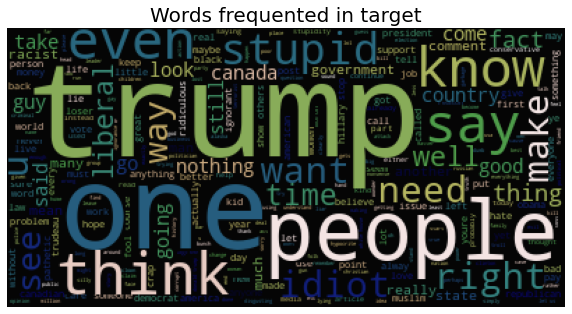

In [23]:
wordcloud(train_clean_df,'target')

In [24]:
train_clean_df['label'] = (train_clean_df['target'] >= 0.5).astype(int)
train_clean_df.head()

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count,label
0,59848,0.000000,cool like would want mother read really great ...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.0,0,4,0
1,59849,0.000000,thank would make life lot less anxietyinducing...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.0,0,4,0
2,59852,0.000000,urgent design problem kudos taking impressive,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.0,0,4,0
3,59855,0.000000,something able install site releasing,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.0,0,4,0
4,59856,0.893617,haha guys bunch losers,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,...,rejected,0,0,0,1,0,0.0,4,47,1


In [25]:
X_train= train_clean_df['comment_text']
y_train = train_clean_df['label']
X_test = test_clean_df['comment_text']

In [26]:
%%time
tokenizer = Tokenizer()
tokenizer.fit_on_texts(list(X_train) + list(X_test))
word_index = tokenizer.word_index
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
X_train = pad_sequences(X_train, maxlen=200, truncating='post', padding='post')
X_test = pad_sequences(X_test, maxlen=200, truncating='post', padding='post')

CPU times: user 2min 5s, sys: 913 ms, total: 2min 6s
Wall time: 2min 7s


In [27]:
embedding_dict = pd.read_pickle('../input/pickled-glove840b300d-for-10sec-loading/glove.840B.300d.pkl')

In [28]:
vocab_size = len(tokenizer.word_index) + 1
vocab_size

685129

In [29]:
vector_matrix = np.zeros((vocab_size, 300))

for word, index in word_index.items():
    vector = embedding_dict.get(word)
    if vector is not None:
        vector_matrix[index] = vector

In [30]:
del train_clean_df, test_clean_df

In [31]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state = 101, test_size = 0.3)

In [32]:
%%time
with tf.device('/device:GPU:0'):

    model = Sequential()
    model.add(Embedding(
        vocab_size, 
        300, 
        input_length=200, 
        weights=[vector_matrix], 
        trainable=False
    ))

    model.add(Bidirectional(LSTM(units=128, return_sequences = True)))
    model.add(GlobalAveragePooling1D())
    model.add(Dropout(0.5))
    model.add(Dense(units = 1, activation = 'sigmoid'))
    model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])
    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=512)

Epoch 1/5
2468/2468 [==============================] - 344s 138ms/step - loss: 0.2043 - accuracy: 0.9308 - val_loss: 0.1351 - val_accuracy: 0.9480
Epoch 2/5
2468/2468 [==============================] - 337s 137ms/step - loss: 0.1344 - accuracy: 0.9479 - val_loss: 0.1310 - val_accuracy: 0.9487
Epoch 3/5
2468/2468 [==============================] - 337s 137ms/step - loss: 0.1271 - accuracy: 0.9507 - val_loss: 0.1283 - val_accuracy: 0.9500
Epoch 4/5
2468/2468 [==============================] - 338s 137ms/step - loss: 0.1223 - accuracy: 0.9522 - val_loss: 0.1286 - val_accuracy: 0.9499
Epoch 5/5
2468/2468 [==============================] - 339s 137ms/step - loss: 0.1175 - accuracy: 0.9538 - val_loss: 0.1291 - val_accuracy: 0.9492
CPU times: user 22min 3s, sys: 46.6 s, total: 22min 50s
Wall time: 28min 22s


In [34]:
model.history.history

{'loss': [0.16250286996364594,
  0.1329350471496582,
  0.12729288637638092,
  0.12264177948236465,
  0.11822852492332458],
 'accuracy': [0.9405221343040466,
  0.9486880898475647,
  0.9505441784858704,
  0.9519990086555481,
  0.9535732865333557],
 'val_loss': [0.13506974279880524,
  0.13097602128982544,
  0.12829454243183136,
  0.12859947979450226,
  0.12914836406707764],
 'val_accuracy': [0.9480315446853638,
  0.9487259387969971,
  0.9499855041503906,
  0.9499356150627136,
  0.9492449164390564]}

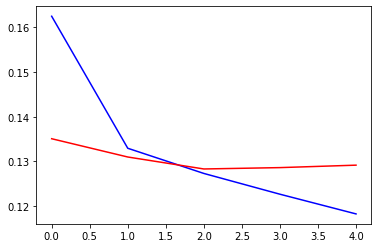

In [36]:
plt.plot(model.history.history['loss'], color='b', label="Training accuracy")
plt.plot(model.history.history['val_loss'], color='r', label="Validation  accuracy")
plt.show()

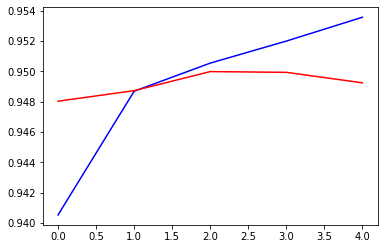

In [38]:
plt.plot(model.history.history['accuracy'], color='b', label="Training accuracy")
plt.plot(model.history.history['val_accuracy'], color='r', label="Validation  accuracy")
plt.show()

In [39]:
submission = pd.read_csv('../input/jigsaw-unintended-bias-in-toxicity-classification/sample_submission.csv', index_col='id')

In [40]:
%%time
submission['prediction'] = model.predict(X_test, batch_size=2048)
submission.head()

CPU times: user 5.84 s, sys: 604 ms, total: 6.44 s
Wall time: 9.65 s


,prediction
id,
7097320,0.001018
7097321,0.028145
7097322,0.038426
7097323,0.003439
7097324,0.001449


In [41]:
submission.to_csv('submission.csv')